In [181]:
import matplotlib.pyplot as plt
import numpy as np

class Viz:
    ''' Base class for visualizations'''
    def __init__(self):
        None
    
    def draw(self):
        assert False, '''draw() not implemented for ''' + type(self).__name__
        
class TimelineViz(Viz):
    ''' Class for Timeline Visualizations for events'''
    def __init__(self):
        Viz.__init__(self)
        self.numRows = 0 # Number of Types of events to vizualize
        self.numCols = 0 # Max number of events over all types TODO Add checks
        self.eventLists = [] # A list of lists of events. Each event is 
                             # stored as a tuple of start and end time
        self.eventOn = [] # A list of bools to indicate if the event has 
                          # started but not yet ended
        self.evntColor = [] # Color for each event. Should be a valid matplotlib color
        self.evntName = [] # Name for each event
        
    def regEventType(self, eventName, color):
        '''Register an event type. Returns int handle for registering events '''
        currRowNum = self.numRows
        
        self.eventLists.append([])
        self.eventOn.append(False)
        self.evntColor.append(color)
        self.evntName.append(eventName)
        self.numRows += 1
        
        return currRowNum

    
    def evntStart(self, evntHandl, evntTime):
        '''Register Event Start'''
        assert self.eventOn[evntHandl] == False, 'Event ' + self.evntName[evntHandl]\
                                                          + ' got a start request without \
                                                          preeceding end request.' 
        self.eventLists[evntHandl].append((evntTime,0)) # Append a tuple of (starttime,endtime)
        self.eventOn[evntHandl] = True
    
    def evntEnd(self, evntHandl, evntTime):
        '''Register Event End'''
        assert self.eventOn[evntHandl] == True, 'Event ' + self.evntName[evntHandl]\
                                                          + ' got a end request without \
                                                          preeceding start request.' 
        lastEvnt = self.eventLists[evntHandl][-1]
        self.eventLists[evntHandl][-1] = (lastEvnt[0],evntTime) # Update only endtime in last registered event
        self.eventOn[evntHandl] = False
    
    def draw(self):
        maxLenEvntName = max([len(x) for x in self.evntName])
        maxNumEnvts = max([len(x) for x in self.eventLists])
        
        fig = plt.figure(maxNumEnvts) # TODO Fix figure size plt.figure(maxNumEnvts)
        ax = fig.add_subplot(111)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_aspect(self.numRows * 2)
        

        for y, row in enumerate(self.eventLists):
            # Add Event Name in graph
            plt.text(-1 * maxLenEvntName -2, (2*y+1) / 2.0, self.evntName[y], 
                                        horizontalalignment='center',
                                        verticalalignment='center')
            
            # Draw timeline
            for evnt in row:
                xStartPoint = evnt[0]
                xEndPoint = evnt[1]
                x1 = [xStartPoint, xEndPoint] # Line X = (envtStart, evntEnd)
                y1 = np.array([y, y]) # Y1 line = (rowNum, RowNum)
                y2 = y1 + 1           # Y2 line = (rowNum+1, RowNum+1)
                plt.fill_between(x1, y1, y2=y2, color=self.evntColor[y])
            
                    
        plt.ylim(self.numRows, 0)
        plt.show()

In [182]:
timeline = TimelineViz()

In [183]:
memEvntHndl = timeline.regEventType('MemAccess','blue')
computeEvntHndl = timeline.regEventType('ComputeActive','green')
print (memEvntHndl,computeEvntHndl)

0 1


In [184]:
baseTimes = [0, 30, 60]
for baseTime in baseTimes:
    timeline.evntStart(memEvntHndl,baseTime + 0)
    timeline.evntEnd(memEvntHndl,baseTime + 10)
    timeline.evntStart(computeEvntHndl,baseTime + 10)
    timeline.evntStart(memEvntHndl,baseTime + 13)
    timeline.evntEnd(computeEvntHndl,baseTime + 11)
    timeline.evntStart(computeEvntHndl,baseTime + 10)
    timeline.evntEnd(memEvntHndl,baseTime + 20)
    timeline.evntEnd(computeEvntHndl,baseTime + 25)

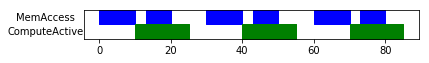

In [185]:
timeline.draw()